In [17]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

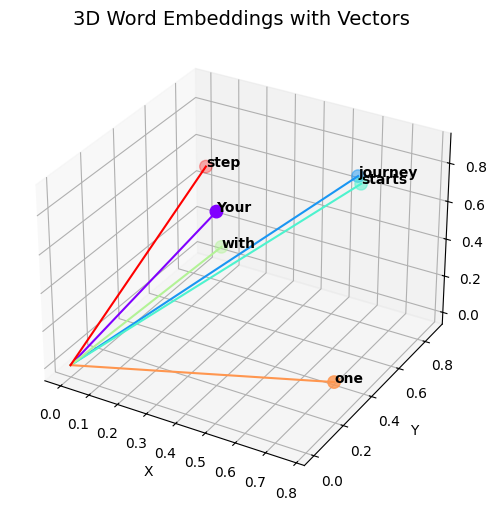

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

words = ["Your", "journey", "starts", "with", "one", "step"]

x, y, z = inputs[:, 0], inputs[:, 1], inputs[:, 2]

# Create 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection="3d")

# Scatter points with colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(words)))
sc = ax.scatter(x, y, z, c=colors, s=80)

# Draw vector (line) from origin to each word point
for xi, yi, zi, word, color in zip(x, y, z, words, colors):
    ax.plot([0, xi], [0, yi], [0, zi], color=color, linestyle="-")  # vector line
    ax.text(xi, yi, zi, word, fontsize=10, weight="bold")            # label

# Axis labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("3D Word Embeddings with Vectors", fontsize=14)

plt.show()

In [16]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

query = inputs[1] # 2nd input token is the query i.e journey 

attn_scores_2 = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [ ]:
import torch

# Define input tensor (6 words, 3D embeddings)
inputs = torch.tensor(
    [[0.43, 0.15, 0.89],  # Your     (x^1)
     [0.55, 0.87, 0.66],  # journey  (x^2)
     [0.57, 0.85, 0.64],  # starts   (x^3)
     [0.22, 0.58, 0.33],  # with     (x^4)
     [0.77, 0.25, 0.10],  # one      (x^5)
     [0.05, 0.80, 0.55]]  # step     (x^6)
)
# Dry Run:
# inputs = tensor([[0.43, 0.15, 0.89], [0.55, 0.87, 0.66], [0.57, 0.85, 0.64],
#                 [0.22, 0.58, 0.33], [0.77, 0.25, 0.10], [0.05, 0.80, 0.55]])

# Select query as the second row (journey)
query = inputs[1]  # 2nd input token is the query i.e journey
# Dry Run: query = tensor([0.55, 0.87, 0.66])

# Initialize empty tensor for attention scores
attn_scores_2 = torch.empty(inputs.shape[0])
# Dry Run: attn_scores_2 = tensor([uninitialized, uninitialized, uninitialized, uninitialized, uninitialized, uninitialized])
# Shape: (6,)

# Compute dot product of query with each input vector
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(torch.tensor(x_i), torch.tensor(query))
    # Dry Run:
    # i = 0: x_i = [0.43, 0.15, 0.89], dot = 0.43*0.55 + 0.15*0.87 + 0.89*0.66 = 0.2365 + 0.1305 + 0.5874 = 0.9544
    # i = 1: x_i = [0.55, 0.87, 0.66], dot = 0.55*0.55 + 0.87*0.87 + 0.66*0.66 = 0.3025 + 0.7569 + 0.4356 = 1.4950
    # i = 2: x_i = [0.57, 0.85, 0.64], dot = 0.57*0.55 + 0.85*0.87 + 0.64*0.66 = 0.3135 + 0.7395 + 0.4224 = 1.4754
    # i = 3: x_i = [0.22, 0.58, 0.33], dot = 0.22*0.55 + 0.58*0.87 + 0.33*0.66 = 0.1210 + 0.5046 + 0.2178 = 0.8434
    # i = 4: x_i = [0.77, 0.25, 0.10], dot = 0.77*0.55 + 0.25*0.87 + 0.10*0.66 = 0.4235 + 0.2175 + 0.0660 = 0.7070
    # i = 5: x_i = [0.05, 0.80, 0.55], dot = 0.05*0.55 + 0.80*0.87 + 0.55*0.66 = 0.0275 + 0.6960 + 0.3630 = 1.0865

# Print the attention scores
print(attn_scores_2)
# Dry Run: tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])

# Structured Dry Run Summary:
# 1. Initialize inputs: tensor([[0.43, 0.15, 0.89], [0.55, 0.87, 0.66], [0.57, 0.85, 0.64], [0.22, 0.58, 0.33], [0.77, 0.25, 0.10], [0.05, 0.80, 0.55]])
# 2. Set query: inputs[1] = tensor([0.55, 0.87, 0.66])  # journey
# 3. Initialize attn_scores_2: tensor([uninitialized, ...], shape=(6,))
# 4. Loop over inputs:
#    - i=0 (Your):   dot([0.43, 0.15, 0.89], query) = 0.9544
#    - i=1 (journey): dot([0.55, 0.87, 0.66], query) = 1.4950
#    - i=2 (starts):  dot([0.57, 0.85, 0.64], query) = 1.4754
#    - i=3 (with):    dot([0.22, 0.58, 0.33], query) = 0.8434
#    - i=4 (one):     dot([0.77, 0.25, 0.10], query) = 0.7070
#    - i=5 (step):    dot([0.05, 0.80, 0.55], query) = 1.0865
# 5. Final attn_scores_2: tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
# 6. Output: Prints the above tensor

In [19]:
attn_weights_2_tmp = attn_scores_2/attn_scores_2.sum()
print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [20]:
attn_scores_2

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])

In [21]:
def softmax_naive(x):
    return torch.exp(x)/torch.exp(x).sum(dim=0)


attn_weights_2_naive = softmax_naive(attn_scores_2)

print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [ ]:
# Structured Dry Run Summary:
# 1. Input: attn_scores_2 = tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
# 2. softmax_naive(attn_scores_2):
#    - Compute exp(x): tensor([2.5967, 4.4596, 4.3734, 2.3239, 2.0278, 2.9641])
#    - Sum of exp(x): 18.7455
#    - Divide: tensor([0.1385, 0.2379, 0.2333, 0.1239, 0.1082, 0.1581])
# 3. attn_weights_2_naive = tensor([0.1385, 0.2379, 0.2333, 0.1239, 0.1082, 0.1581])
# 4. Print: Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1239, 0.1082, 0.1581])
# 5. Sum: 1.0000
# 6. Print: Sum: tensor(1.0000)

In [23]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)

print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


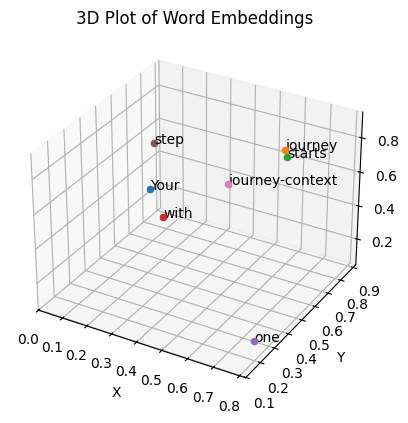

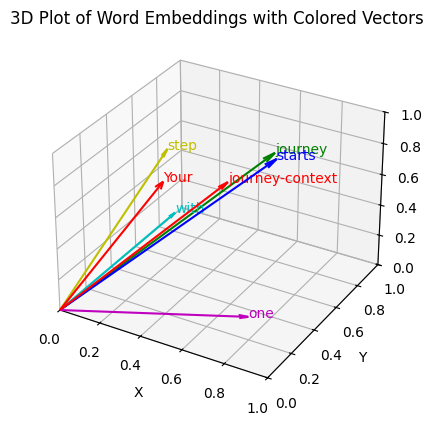

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
   [0.4419, 0.6515, 0.5683]]
)

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

In [32]:
query = inputs[1]

context_vec_2 = torch.zeros(query.shape)
for i, xi in enumerate(inputs[:len(attn_weights_2)]):
    context_vec_2 += attn_weights_2[i] * xi

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


In [ ]:
query = inputs[1]
# Structured Dry Run:
# 1. query = inputs[1] = tensor([0.55, 0.87, 0.66])  # journey

context_vec_2 = torch.zeros(query.shape)
# 2. Initialize context_vec_2 = tensor([0.0, 0.0, 0.0])  # shape=(3,)

for i, xi in enumerate(inputs[:len(attn_weights_2)]):
    context_vec_2 += attn_weights_2[i] * xi
    # 3. Loop over inputs[:6] (same as inputs, shape=(6,3)):
    #    - i=0 (Your):   
    #      xi=[0.43, 0.15, 0.89], attn_weights_2[0]=0.1385, += 0.1385 * [0.43, 0.15, 0.89] = [0.0596, 0.0208, 0.1233], context_vec_2=[0.0596, 0.0208, 0.1233]
    #    - i=1 (journey): 
    #      xi=[0.55, 0.87, 0.66], attn_weights_2[1]=0.2379, += 0.2379 * [0.55, 0.87, 0.66] = [0.1308, 0.2070, 0.1570], context_vec_2=[0.1904, 0.2278, 0.2803]
    #    - i=2 (starts):  
    #      xi=[0.57, 0.85, 0.64], attn_weights_2[2]=0.2333, += 0.2333 * [0.57, 0.85, 0.64] = [0.1329, 0.1983, 0.1493], context_vec_2=[0.3233, 0.4261, 0.4296]
    #    - i=3 (with):    
    #      xi=[0.22, 0.58, 0.33], attn_weights_2[3]=0.1239, += 0.1239 * [0.22, 0.58, 0.33] = [0.0273, 0.0719, 0.0409], context_vec_2=[0.3506, 0.4980, 0.4705]
    #    - i=4 (one):     
    #      xi=[0.77, 0.25, 0.10], attn_weights_2[4]=0.1082, += 0.1082 * [0.77, 0.25, 0.10] = [0.0833, 0.0271, 0.0108], context_vec_2=[0.4339, 0.5251, 0.4813]
    #    - i=5 (step):    
    #      xi=[0.05, 0.80, 0.55], attn_weights_2[5]=0.1581, += 0.1581 * [0.05, 0.80, 0.55] = [0.0079, 0.1265, 0.0870], context_vec_2=[0.4418, 0.6516, 0.5683]

print(context_vec_2)
# 4. Final context_vec_2 = tensor([0.4418, 0.6516, 0.5683])
# 5. Print: tensor([0.4418, 0.6516, 0.5683])

In [36]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

attn_scores = torch.empty(6, 6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [37]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [ ]:

attn_scores = inputs @ inputs.T
# Dry Run:
# inputs.T = tensor([[0.43, 0.55, 0.57, 0.22, 0.77, 0.05],
#                    [0.15, 0.87, 0.85, 0.58, 0.25, 0.80],
#                    [0.89, 0.66, 0.64, 0.33, 0.10, 0.55]])
# attn_scores = inputs @ inputs.T (6x3 @ 3x6 = 6x6)
# i=0: [0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310]
# i=1: [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865]
# i=2: [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605]
# i=3: [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565]
# i=4: [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935]
# i=5: [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]
# attn_scores = tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
#                      [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
#                      [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
#                      [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
#                      [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
#                      [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

print(attn_scores)
# Dry Run:
# Print: tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
#               [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
#               [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
#               [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
#               [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
#               [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

# Structured Dry Run Summary:
# 1. Initialize inputs: tensor([[0.43, 0.15, 0.89], [0.55, 0.87, 0.66], [0.57, 0.85, 0.64], [0.22, 0.58, 0.33], [0.77, 0.25, 0.10], [0.05, 0.80, 0.55]])
# 2. Compute inputs.T: tensor([[0.43, 0.55, 0.57, 0.22, 0.77, 0.05],
#                             [0.15, 0.87, 0.85, 0.58, 0.25, 0.80],
#                             [0.89, 0.66, 0.64, 0.33, 0.10, 0.55]])
# 3. Compute attn_scores = inputs @ inputs.T (6x3 @ 3x6 = 6x6):
#    - i=0 (Your):   [0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310]
#    - i=1 (journey): [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865]
#    - i=2 (starts):  [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605]
#    - i=3 (with):    [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565]
#    - i=4 (one):     [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935]
#    - i=5 (step):    [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]
# 4. Final attn_scores: tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
#                              [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
#                              [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
#                              [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
#                              [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
#                              [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
# 5. Print: Outputs the above 6x6 tensor

In [39]:
attn_weights = torch.softmax(attn_scores, dim=-1)

print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [40]:
attn_weights.sum(dim=-1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [41]:
all_context_vecs = attn_weights @ inputs

print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [ ]:
# Structured Dry Run:
# 1. Input: attn_weights = tensor([[0.2098, 0.2005, 0.1982, 0.1243, 0.1220, 0.1452],
#                                 [0.1385, 0.2379, 0.2333, 0.1239, 0.1082, 0.1581],
#                                 [0.1390, 0.2369, 0.2328, 0.1242, 0.1108, 0.1565],
#                                 [0.1435, 0.2073, 0.2045, 0.1462, 0.1262, 0.1720],
#                                 [0.1526, 0.1959, 0.1975, 0.1367, 0.1879, 0.1295],
#                                 [0.1384, 0.2183, 0.2127, 0.1420, 0.0988, 0.1896]])

#                inputs = tensor([[0.43, 0.15, 0.89], 
#                                 [0.55, 0.87, 0.66], 
#                                 [0.57, 0.85, 0.64], 
#                                 [0.22, 0.58, 0.33], 
#                                 [0.77, 0.25, 0.10], 
#                                 [0.05, 0.80, 0.55]])

# 2. Compute all_context_vecs = attn_weights @ inputs (6x6 @ 6x3 = 6x3):

#    - Row 0: [sum(0.2098*0.43 + 0.2005*0.55 + 0.1982*0.57 + 0.1243*0.22 + 0.1220*0.77 + 0.1452*0.05) = 0.4289,
#              sum(0.2098*0.15 + 0.2005*0.87 + 0.1982*0.85 + 0.1243*0.58 + 0.1220*0.25 + 0.1452*0.80) = 0.5905,
#              sum(0.2098*0.89 + 0.2005*0.66 + 0.1982*0.64 + 0.1243*0.33 + 0.1220*0.10 + 0.1452*0.55) = 0.4894]
#    - Row 1: [sum(0.1385*0.43 + 0.2379*0.55 + 0.2333*0.57 + 0.1239*0.22 + 0.1082*0.77 + 0.1581*0.05) = 0.4418,
#              sum(0.1385*0.15 + 0.2379*0.87 + 0.2333*0.85 + 0.1239*0.58 + 0.1082*0.25 + 0.1581*0.80) = 0.6516,
#              sum(0.1385*0.89 + 0.2379*0.66 + 0.2333*0.64 + 0.1239*0.33 + 0.1082*0.10 + 0.1581*0.55) = 0.5683]
#    - Row 2: [sum(0.1390*0.43 + 0.2369*0.55 + 0.2328*0.57 + 0.1242*0.22 + 0.1108*0.77 + 0.1565*0.05) = 0.4425,
#              sum(0.1390*0.15 + 0.2369*0.87 + 0.2328*0.85 + 0.1242*0.58 + 0.1108*0.25 + 0.1565*0.80) = 0.6495,
#              sum(0.1390*0.89 + 0.2369*0.66 + 0.2328*0.64 + 0.1242*0.33 + 0.1108*0.10 + 0.1565*0.55) = 0.5660]
#    - Row 3: [sum(0.1435*0.43 + 0.2073*0.55 + 0.2045*0.57 + 0.1462*0.22 + 0.1262*0.77 + 0.1720*0.05) = 0.4264,
#              sum(0.1435*0.15 + 0.2073*0.87 + 0.2045*0.85 + 0.1462*0.58 + 0.1262*0.25 + 0.1720*0.80) = 0.6287,
#              sum(0.1435*0.89 + 0.2073*0.66 + 0.2045*0.64 + 0.1462*0.33 + 0.1262*0.10 + 0.1720*0.55) = 0.5477]
#    - Row 4: [sum(0.1526*0.43 + 0.1959*0.55 + 0.1975*0.57 + 0.1367*0.22 + 0.1879*0.77 + 0.1295*0.05) = 0.4622,
#              sum(0.1526*0.15 + 0.1959*0.87 + 0.1975*0.85 + 0.1367*0.58 + 0.1879*0.25 + 0.1295*0.80) = 0.5812,
#              sum(0.1526*0.89 + 0.1959*0.66 + 0.1975*0.64 + 0.1367*0.33 + 0.1879*0.10 + 0.1295*0.55) = 0.4993]
#    - Row 5: [sum(0.1384*0.43 + 0.2183*0.55 + 0.2127*0.57 + 0.1420*0.22 + 0.0988*0.77 + 0.1896*0.05) = 0.4169,
#              sum(0.1384*0.15 + 0.2183*0.87 + 0.2127*0.85 + 0.1420*0.58 + 0.0988*0.25 + 0.1896*0.80) = 0.6494,
#              sum(0.1384*0.89 + 0.2183*0.66 + 0.2127*0.64 + 0.1420*0.33 + 0.0988*0.10 + 0.1896*0.55) = 0.5533]

# 3. Final all_context_vecs = tensor([[0.4289, 0.5905, 0.4894],
#                                    [0.4418, 0.6516, 0.5683],
#                                    [0.4425, 0.6495, 0.5660],
#                                    [0.4264, 0.6287, 0.5477],
#                                    [0.4622, 0.5812, 0.4993],
#                                    [0.4169, 0.6494, 0.5533]])

# Structured Dry Run:
# 4. Print: tensor([[0.4289, 0.5905, 0.4894],
#                  [0.4418, 0.6516, 0.5683],
#                  [0.4425, 0.6495, 0.5660],
#                  [0.4264, 0.6287, 0.5477],
#                  [0.4622, 0.5812, 0.4993],
#                  [0.4169, 0.6494, 0.5533]])